In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bali 2015 - 2022.csv to Bali 2015 - 2022.csv


In [3]:
data = pd.read_csv('Bali 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output

#80 -20 RATIO

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [6]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 4s - loss: 0.5053 - val_loss: 0.1353 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.4648 - val_loss: 0.1113 - 77ms/epoch - 26ms/step
Epoch 3/50
3/3 - 0s - loss: 0.4273 - val_loss: 0.0911 - 74ms/epoch - 25ms/step
Epoch 4/50
3/3 - 0s - loss: 0.3905 - val_loss: 0.0749 - 48ms/epoch - 16ms/step
Epoch 5/50
3/3 - 0s - loss: 0.3564 - val_loss: 0.0622 - 51ms/epoch - 17ms/step
Epoch 6/50
3/3 - 0s - loss: 0.3245 - val_loss: 0.0530 - 55ms/epoch - 18ms/step
Epoch 7/50
3/3 - 0s - loss: 0.2944 - val_loss: 0.0474 - 79ms/epoch - 26ms/step
Epoch 8/50
3/3 - 0s - loss: 0.2674 - val_loss: 0.0451 - 55ms/epoch - 18ms/step
Epoch 9/50
3/3 - 0s - loss: 0.2414 - val_loss: 0.0462 - 70ms/epoch - 23ms/step
Epoch 10/50
3/3 - 0s - loss: 0.2175 - val_loss: 0.0506 - 49ms/epoch - 16ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1948 - val_loss: 0.0582 - 53ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1753 - val_loss: 0.0688 - 51ms/epoch - 17ms/step
Epoch 13/50
3/3 - 0s - loss: 0.1585 - val_loss: 0.082

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 1s 1s/step
Mean Squared Error (MSE): 444347598.08444536
Mean Absolute Error (MAE): 19216.175427397302
Mean Absolute Percentage Error (MAPE): 106.42%


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE with a check for zero values in y_test
mape = np.mean(np.abs((y_test - y_pred) / np.clip(np.abs(y_test), 1e-10, np.inf))) * 100

# Calculate R-squared value and make it non-negative
r2 = r2_score(y_test, y_pred)
r2_non_negative = abs(r2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'R-squared (R2): {r2_non_negative}')

Mean Squared Error (MSE): 0.2542288733134001
Mean Absolute Error (MAE): 0.45964017253743683
Mean Absolute Percentage Error (MAPE): 112110513049.72%
R-squared (R2): 4.754170852709414


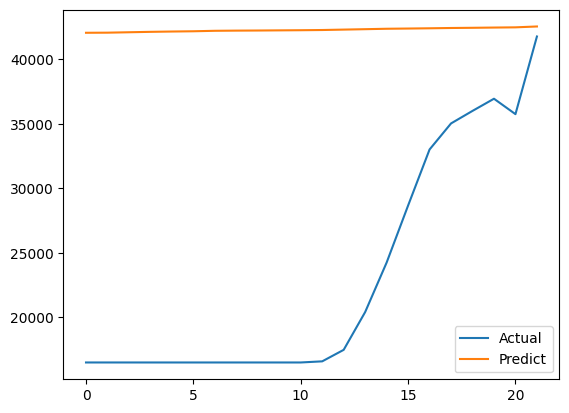

In [10]:
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predict')
plt.legend()
plt.show()

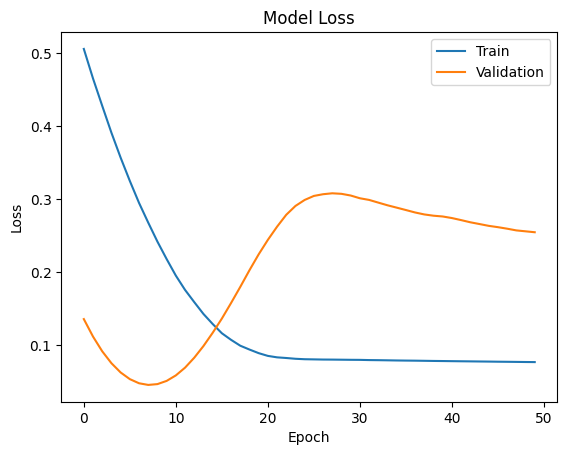

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [12]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

1/1 [==============================] - 0s 29ms/step


#70 - 30 RATIO

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [14]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [15]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 3s - loss: 0.4802 - val_loss: 0.0389 - 3s/epoch - 873ms/step
Epoch 2/50
3/3 - 0s - loss: 0.4392 - val_loss: 0.0346 - 43ms/epoch - 14ms/step
Epoch 3/50
3/3 - 0s - loss: 0.4006 - val_loss: 0.0335 - 53ms/epoch - 18ms/step
Epoch 4/50
3/3 - 0s - loss: 0.3641 - val_loss: 0.0358 - 39ms/epoch - 13ms/step
Epoch 5/50
3/3 - 0s - loss: 0.3291 - val_loss: 0.0414 - 54ms/epoch - 18ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2949 - val_loss: 0.0505 - 40ms/epoch - 13ms/step
Epoch 7/50
3/3 - 0s - loss: 0.2633 - val_loss: 0.0630 - 54ms/epoch - 18ms/step
Epoch 8/50
3/3 - 0s - loss: 0.2332 - val_loss: 0.0790 - 38ms/epoch - 13ms/step
Epoch 9/50
3/3 - 0s - loss: 0.2040 - val_loss: 0.0985 - 41ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1779 - val_loss: 0.1218 - 59ms/epoch - 20ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1530 - val_loss: 0.1487 - 55ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1299 - val_loss: 0.1790 - 57ms/epoch - 19ms/step
Epoch 13/50
3/3 - 0s - loss: 0.1088 - val_loss: 0.

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 1190285228.1746948
Mean Absolute Error (MAE): 33885.09955530443
Mean Absolute Percentage Error (MAPE): 187.08%


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE with a check for zero values in y_test
mape = np.mean(np.abs((y_test - y_pred) / np.clip(np.abs(y_test), 1e-10, np.inf))) * 100

# Calculate R-squared value and make it non-negative
r2 = r2_score(y_test, y_pred)
r2_non_negative = abs(r2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'R-squared (R2): {r2_non_negative}')

Mean Squared Error (MSE): 0.6810093274562892
Mean Absolute Error (MAE): 0.8105126083670453
Mean Absolute Percentage Error (MAPE): 110936220028.62%
R-squared (R2): 18.501946855751903


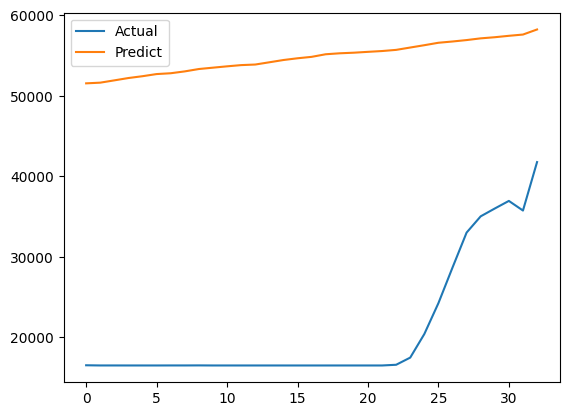

In [18]:
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predict')
plt.legend()
plt.show()

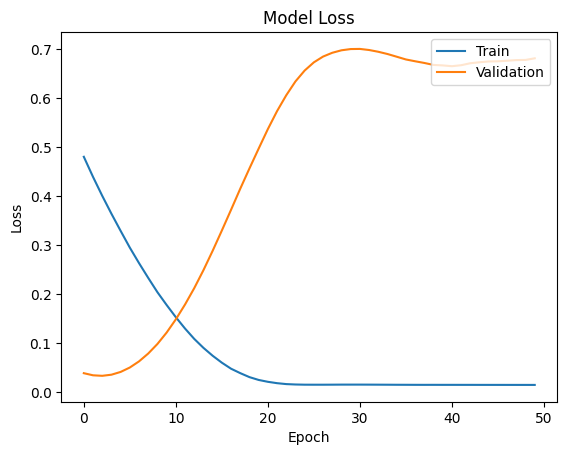

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

1/1 [==============================] - 0s 33ms/step


#60 - 40 RATIO

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [22]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [23]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
2/2 - 6s - loss: 0.4704 - val_loss: 0.2149 - 6s/epoch - 3s/step
Epoch 2/50
2/2 - 0s - loss: 0.4448 - val_loss: 0.2008 - 82ms/epoch - 41ms/step
Epoch 3/50
2/2 - 0s - loss: 0.4212 - val_loss: 0.1881 - 72ms/epoch - 36ms/step
Epoch 4/50
2/2 - 0s - loss: 0.3968 - val_loss: 0.1767 - 112ms/epoch - 56ms/step
Epoch 5/50
2/2 - 0s - loss: 0.3744 - val_loss: 0.1667 - 90ms/epoch - 45ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3522 - val_loss: 0.1579 - 76ms/epoch - 38ms/step
Epoch 7/50
2/2 - 0s - loss: 0.3306 - val_loss: 0.1504 - 86ms/epoch - 43ms/step
Epoch 8/50
2/2 - 0s - loss: 0.3093 - val_loss: 0.1443 - 83ms/epoch - 41ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2891 - val_loss: 0.1394 - 64ms/epoch - 32ms/step
Epoch 10/50
2/2 - 0s - loss: 0.2695 - val_loss: 0.1358 - 138ms/epoch - 69ms/step
Epoch 11/50
2/2 - 0s - loss: 0.2504 - val_loss: 0.1335 - 91ms/epoch - 45ms/step
Epoch 12/50
2/2 - 0s - loss: 0.2316 - val_loss: 0.1325 - 188ms/epoch - 94ms/step
Epoch 13/50
2/2 - 0s - loss: 0.2136 - val_loss: 0.

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 6ms/step
Mean Squared Error (MSE): 896253414.658324
Mean Absolute Error (MAE): 26674.15887623138
Mean Absolute Percentage Error (MAPE): 143.01%


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE with a check for zero values in y_test
mape = np.mean(np.abs((y_test - y_pred) / np.clip(np.abs(y_test), 1e-10, np.inf))) * 100

# Calculate R-squared value and make it non-negative
r2 = r2_score(y_test, y_pred)
r2_non_negative = abs(r2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'R-squared (R2): {r2_non_negative}')

Mean Squared Error (MSE): 0.5127820673157067
Mean Absolute Error (MAE): 0.6380309368838142
Mean Absolute Percentage Error (MAPE): 80403624275.05%
R-squared (R2): 3.008466286429


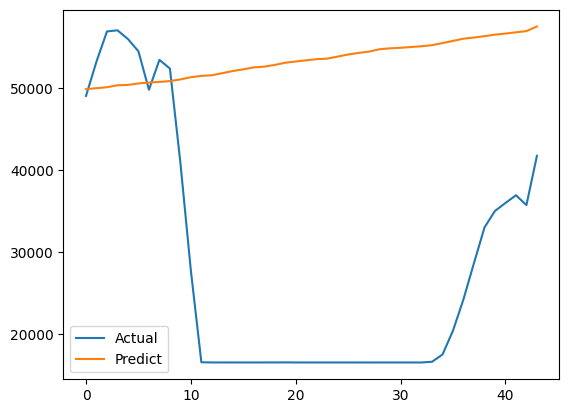

In [26]:
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predict')
plt.legend()
plt.show()

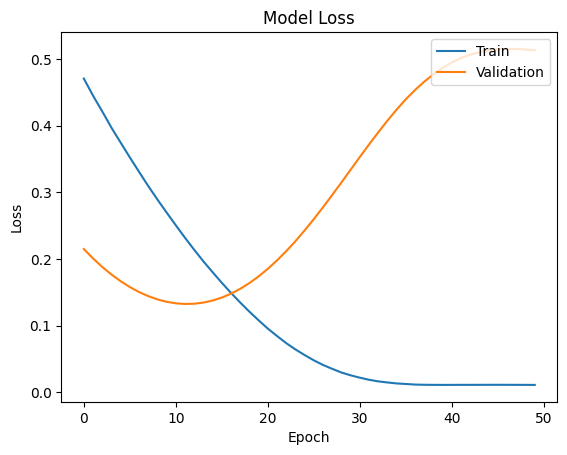

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

1/1 [==============================] - 0s 20ms/step


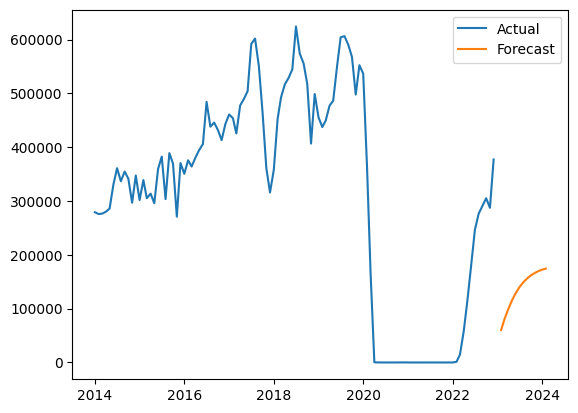

In [ ]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast')
plt.legend()
plt.show()

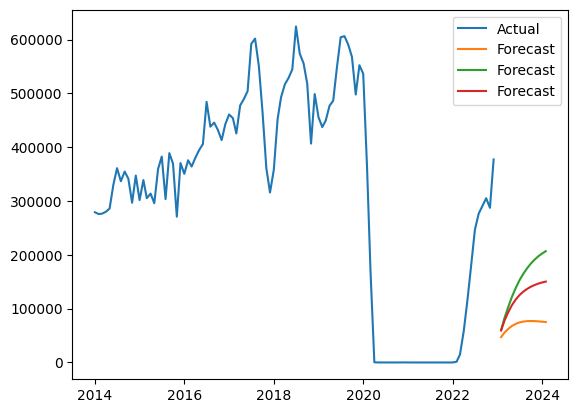

In [ ]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast')
plt.legend()
plt.show()